
# Movies Analysis for Microsoft
![microsoft logo](./images/ms_logo.jpg)

## Overview

This project shows analysis on movie markets to help Microsoft start building a new movie studio. Several key aspects of popular movies are selected for the analysis. The analysis includes visualizations that would help on where to start.

## Business Problem

As Microsoft has no background in filming a movie, concrete information is needed for a guide on creating a new movie studio. Microsoft is interested in what is needed to be successful. The analysis will cover several aspects of movies that are fairly recent.

## Data Understanding

Data is collected from well-known websites for movie databases. For the analysis, the selected aspects of the movie are [gross & budget](https://www.the-numbers.com/), [genre](https://www.themoviedb.org/), and [runtime](https://www.imdb.com/).

In [1]:
# import necessary libraries
import pandas as pd
import sqlite3


import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.ticker import FuncFormatter

In [2]:
# read data
# profit and budget in csv
df_p = pd.read_csv('data/tn.movie_budgets.csv.gz')

# genre in csv
df_g = pd.read_csv('data/tmdb.movies.csv.gz')

# runtime in sql database
con = sqlite3.connect("data/im.db")

## Three dataset for profit & budget, genre, and runtime
Each source has a different format. One column that can be used for the merge is the name of the movie.

In [3]:
df_p.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [4]:
df_g.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [5]:
pd.read_sql(""" SELECT * FROM movie_basics; """, con).head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


## Data Preparation

In [6]:
#import libraries to clean data
import code.data_preparation as dp

### Data Cleaning
The movies are chosen with release years on and after 2000, and this range can be modified as well.

In [7]:
# set year
# this can be modified per request
set_year = 2000

The budget and gross information are cleaned by removing commas and dollar signs. Any movies with zero gross are removed. Then, profit is calculated by subtracting budget from world gross. No duplicate row was found. The year value from the release date is extracted.

For genre data, unnecessary columns and duplicate rows are removed.

For runtime data, only necessary columns are selected using SELECT statement. Null values are not selected. No duplicate row was found.

In [8]:
df_p = dp.profit(df_p, set_year)
df_g = dp.genre(df_g)
df_r = dp.runtime(con)

The number of selected movies is 4045.

In [9]:
len(df_p)

4045

Before merging, the movie names were cleaned by three steps.
1. lowercase names
2. remove spaces
3. remove punctuations

In [10]:
df_p.movie = dp.movie_name_clean(df_p.movie)
df_g.title = dp.movie_name_clean(df_g.title)
df_r.primary_title = dp.movie_name_clean(df_r.primary_title)

To study the relationship between budget and profit, the profit is categorized by ranges as the first step. Then, the quantiles of the budget are calculated for each profit range.

In [11]:
budget = dp.budget(df_p)

Since each movie can have multiple genres, each element of genre column is cleaned to be a list of genre ids. Each genre id has quantiles of profit.

In [12]:
df_genre = df_p.merge(df_g, how = 'inner', left_on = 'movie', right_on = 'title')
Genre = dp.genre_count(df_genre)
len(df_genre)

1948

The runtime is categorized by its ranges as it was done for profit. For each runtime range, the quantiles of profit are calculated.

In [13]:
df_runtime = df_p.merge(df_r, how = 'inner', left_on = 'movie', right_on = 'primary_title')
runtime = dp.runtime_range(df_runtime)
len(df_runtime)

2800

## Analysis

In [14]:
import code.visualizations as viz

### Profit distribution
Profit distribution shows median would represent the data better than the average would.

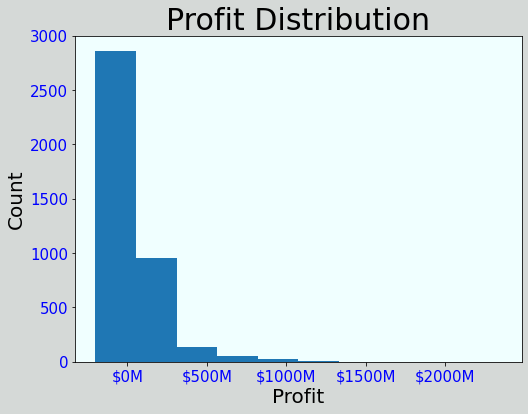

In [15]:
viz.profit(df_p)

### Budget distribution
A movie tends to be more successful as the budget increases.

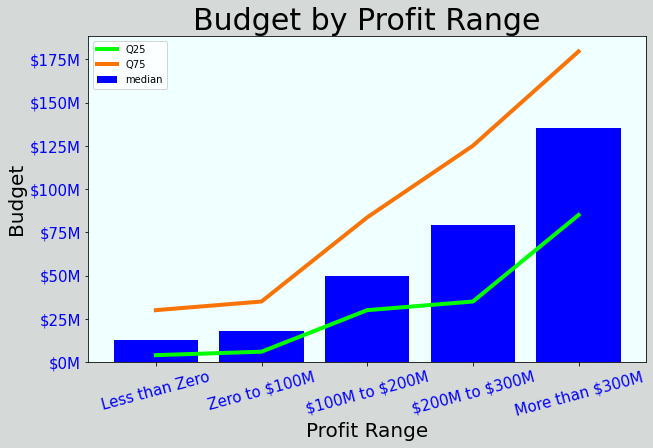

In [16]:
viz.budget(budget)

### Genre distribution
The most profitable genres are animation, adventure, fantasy, family, and Science Fiction.

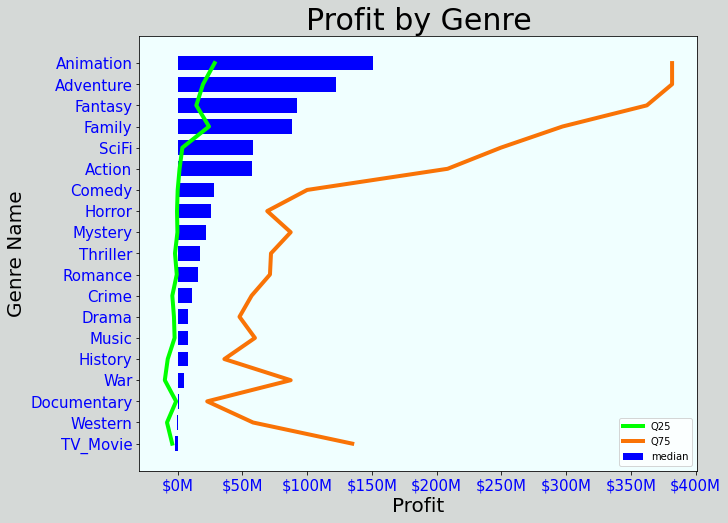

In [17]:
viz.genre(Genre)

###  Runtime distribution
A movie seems to make the most profit as the runtime is over 120 minutes.

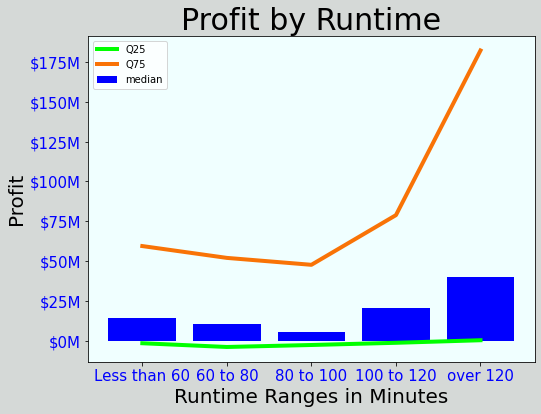

In [18]:
viz.runtime(runtime)

## Conclusions

There are three recommendations to consider to build a new movie studio.

- **The movie tends to be more successful as the budget increases.** This would be a tough decision, but it is encouraged to set the budget as high as possible.
- **The most profitable genres are animation, adventure, fantasy, family, science fiction, action.** The chart shows that those genres typically have profits above zero. It is recommended to choose genres as much as from the six genres.
- **A movie seems to make the most profit as the runtime is over 120 minutes.** The suggested minimum runtime is above 100 minutes, but the runtime over 120 minutes is highly recommended.

### Next Steps

Further analysis could help gain more ideas on creating a new movie.

- **Run the same analysis again for the movies with negative profit.** As the analysis was made for the overall movies, it would be a good idea to do a separate study on the movies with negative profit. This would guide Microsoft on what to avoid when filming a new movie.
- **Research by relating aspects to budget.** Just like how profit was analyzed, the budget can also be related to genre and runtime.
- **Study how the budget can be spent.** Studying on the budget can lead us to other aspects of the movies. The other aspects can be casting size, filming location, and graphic labor or editing cost.